## **Principal Component Analysis**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load the dataset obtained in hometask #2
df = pd.read_csv('descriptors_treshod_method.csv', low_memory=False)
df

,ABC,ABCGG,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,VR1_A,VR2_A,VR3_A,...,fr_epoxide,fr_ether,fr_ketone,fr_ketone_Topliss,fr_methoxy,fr_nitrile,fr_piperdine,fr_term_acetylene,fr_unbrch_alkane,gap
0,7.737734,7.114926,0,12.101350,2.579512,4.826492,12.101350,33.783141,3.753682,3.414601,...,1,1,0,0,0,0,0,0,0,0.3261
1,6.432911,6.705077,0,11.347542,2.230251,4.335428,11.347542,29.048123,3.227569,3.263593,...,0,0,0,0,0,0,0,0,0,0.2341
2,7.168527,7.450954,1,11.200768,2.481194,4.778203,11.200768,31.178556,3.464284,3.334370,...,1,1,1,1,0,0,0,0,0,0.2200
3,7.731245,8.614606,1,11.516350,2.837971,5.089399,11.516350,38.067875,4.229764,3.534010,...,0,0,0,0,0,0,1,0,0,0.2488
4,6.949747,6.738856,1,10.955632,2.605889,4.801940,10.955632,30.675804,3.834475,3.200331,...,0,0,0,0,0,0,0,0,0,0.3210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,6.611250,6.419894,0,10.891331,2.263821,4.527642,10.891331,26.623093,2.958121,3.176418,...,0,0,0,0,0,0,0,0,0,0.1459
19996,7.614515,7.687794,0,12.019265,2.732977,5.279081,12.019265,35.925696,3.991744,3.476092,...,0,2,0,0,0,0,0,0,0,0.2022
19997,6.501860,6.631398,0,10.665324,2.364871,4.729742,10.665324,34.366436,3.818493,3.431720,...,0,1,0,0,0,0,0,0,0,0.2208
19998,6.323521,6.843639,0,11.385677,2.372130,4.254884,11.385677,48.835905,5.426212,3.783105,...,0,1,0,0,0,0,0,0,0,0.2481


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 1084 entries, ABC to gap
dtypes: float64(659), int64(155), object(270)
memory usage: 165.4+ MB


In [4]:
# Converting object to float
object_columns = df.select_dtypes(include=['object']).columns

for col in object_columns:
    try:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    except ValueError:
        print(f"Could not convert column '{col}' to float")

In [5]:
df.isnull().values.any()

True

In [6]:
df = df.fillna(df.mean())

In [7]:
#Divide data into X - numeric descriptors and Y - target
X = df.drop(['gap'],axis=1)
Y = df['gap']

#Scale X in range [0, 1]
X_norm = MinMaxScaler().fit_transform(X)

In [8]:
from sklearn.decomposition import PCA

Selecting number of components

In [9]:
#Perform PCA with specified variance of 95%
pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(X_norm)

#Print results
print('Original Dimensions: ',X_norm.shape)
print('Reduced Dimensions: ',X_reduced.shape)
print("Explained variance: ", pca.explained_variance_ratio_.sum())

Original Dimensions:  (20000, 1083)
Reduced Dimensions:  (20000, 69)
Explained variance:  0.951112338431347


**95%** of variance is observed with **69 dimensions** or principal components

In [10]:
# Perform PCA with 69 components
pca = PCA(n_components=69)
X_pca = pca.fit_transform(X_norm)

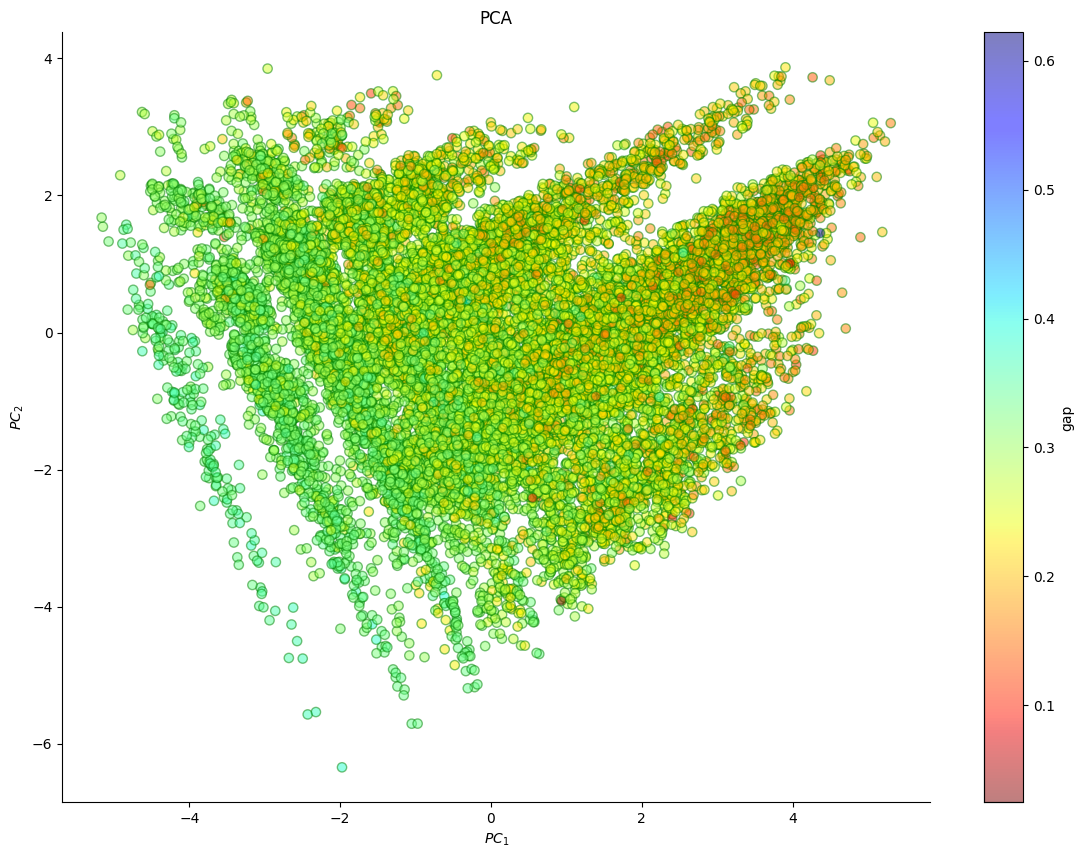

In [14]:
#Plot results colored by target values
fig = plt.figure(figsize=(14,10))
ax  = fig.add_subplot(111)
scatter = ax.scatter(X_pca[:,0], -X_pca[:,1], c=Y, s=45, edgecolors='green', cmap=cm.jet_r, alpha=0.5)
colorbar = fig.colorbar(scatter, ax=ax, label = "gap")
plt.xlabel(r'$PC_1$')
plt.ylabel(r'$PC_2$')
plt.title('PCA')
sns.despine()
plt.show()




So, this graph shows the dependence of the target value on PC1, the more PC1, the less gap.

## **Kernel PCA**

In [15]:
from sklearn.decomposition import KernelPCA


#Perform kernel PCA with sigmoid kernel
sigmoid_pca = KernelPCA(n_components = 2, kernel='sigmoid', gamma=0.01)
X_sigmoid = sigmoid_pca.fit_transform(X_norm)

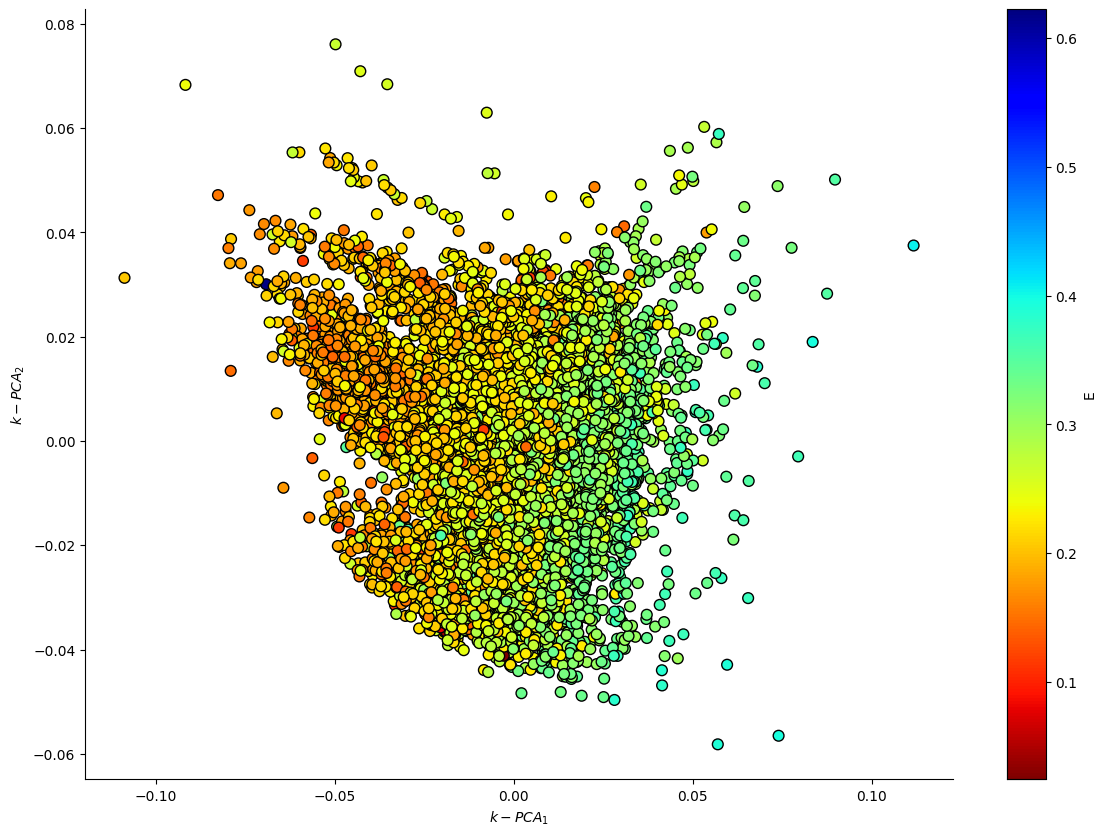

In [17]:
#Plot results
fig = plt.figure(figsize=(14,10))
ax  = fig.add_subplot(111)
scatter = ax.scatter(X_sigmoid[:, 0], X_sigmoid[:, 1], c = Y, s=60, edgecolors='black', cmap=cm.jet_r)
colorbar = fig.colorbar(scatter, ax=ax, label = "E")
plt.xlabel(r'$k-PCA_1$')
plt.ylabel(r'$k-PCA_2$')
sns.despine()
plt.show()

So, this graph shows the dependence of the target value on PC1, the more PC1, the more gap.

## **T-distributed Stochastic Neighbor Embedding**

In [18]:
from sklearn.manifold import TSNE

In [19]:
#Perform t-SNE
tsne = TSNE(n_components=2, perplexity=50)
X_tsne = tsne.fit_transform(X_norm)

In [27]:
X_tsne.shape

(20000, 2)

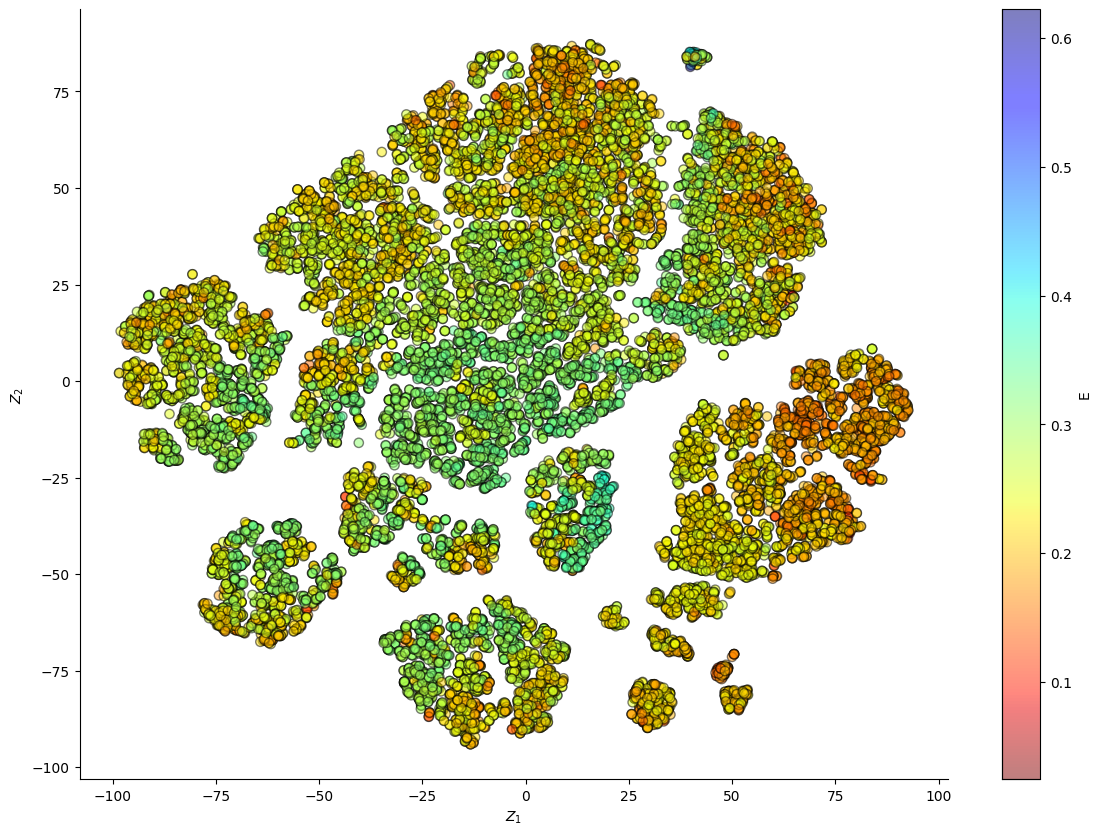

In [20]:
#Plot results
fig = plt.figure(figsize=(14,10))
ax  = fig.add_subplot(111)
scatter = ax.scatter(X_tsne[:,0], X_tsne[:,1], c=Y, s=45, edgecolors='black', cmap=cm.jet_r, alpha=0.5)
colorbar = fig.colorbar(scatter, ax=ax, label = "E")
plt.xlabel(r'$Z_1$')
plt.ylabel(r'$Z_2$')
sns.despine()
plt.show()

## **Uniform Manifold Approximation and Projection**

In [23]:
import umap

In [24]:
#Perform UMAP
X_umap =  umap.UMAP(n_components=5,min_dist=0.1,metric='manhattan').fit_transform(X_norm)

In [26]:
X_umap.shape

(20000, 5)

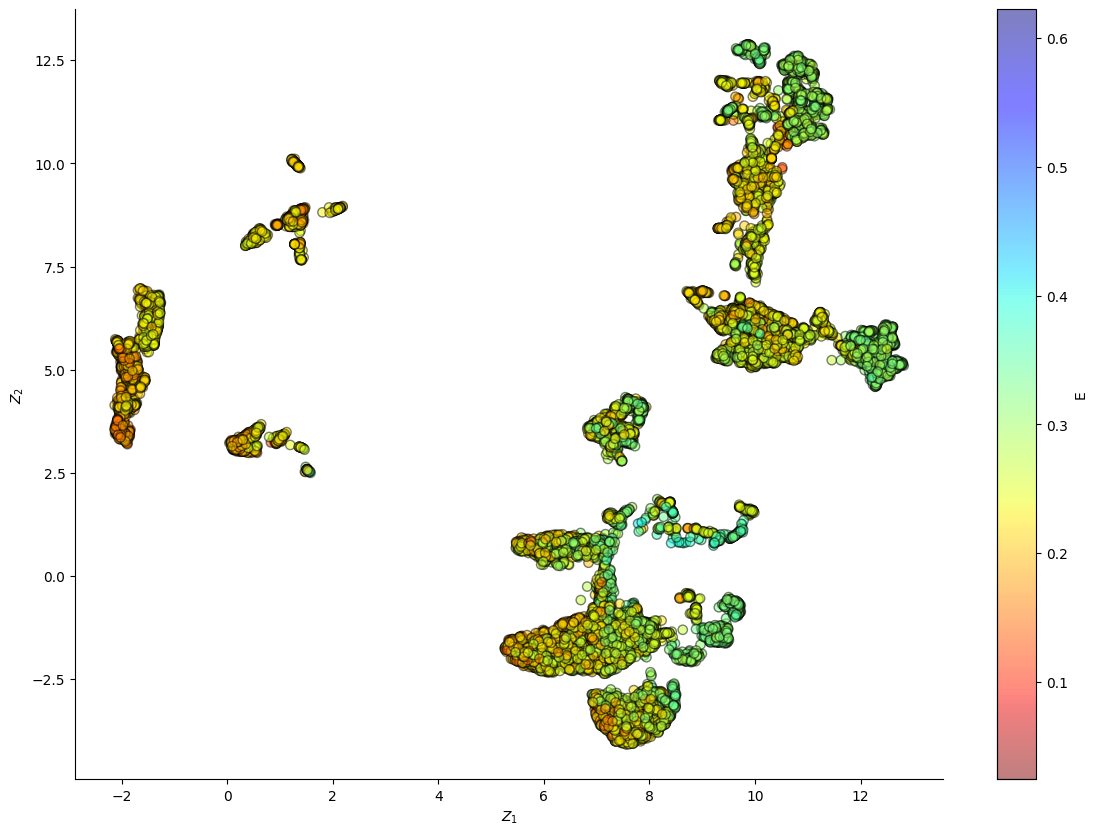

In [25]:
#Plot results
fig = plt.figure(figsize=(14,10))
ax  = fig.add_subplot(111)
scatter = ax.scatter(X_umap[:,0], X_umap[:,1], c=Y, s=45, edgecolors='black', cmap=cm.jet_r, alpha=0.5)
colorbar = fig.colorbar(scatter, ax=ax, label = "E")
plt.xlabel(r'$Z_1$')
plt.ylabel(r'$Z_2$')
sns.despine()
plt.show()

So, the linear method PCA and non-linear Kernel PCA shows good target value dependence on PC1, but other methods like TSNE or UMAP are not informative